In [1]:
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.applications import VGG16
from tensorflow.keras import regularizers
from sklearn.model_selection import KFold

In [2]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=45,
    brightness_range=[0.7, 1.3],
    fill_mode='nearest',
    validation_split=0.2
)

In [3]:
data_directory = r"C:\Users\admin\Desktop\Projects\CS-Project\Tea-Leaf-Comprehensive-Anaysis\Data\Sickness" 

In [4]:
train_generator = train_datagen.flow_from_directory(
    data_directory,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

Found 926 images belonging to 8 classes.


In [5]:
# Validation Data Generator
validation_generator = train_datagen.flow_from_directory(
    data_directory,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 228 images belonging to 8 classes.


In [6]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = True
for layer in base_model.layers[:-10]:  
    layer.trainable = False
model = tf.keras.Sequential()
model.add(base_model)
model.add(tf.keras.layers.GlobalAveragePooling2D())
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(8, activation='softmax'))

In [7]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint(f'Disease_classifier.keras', save_best_only=True)

In [9]:
history = model.fit(
        train_generator,
        epochs=50,
        validation_data=validation_generator,
        callbacks=[early_stop, model_checkpoint]
    )

Epoch 1/50


c:\Users\admin\Desktop\Projects\CS-Project\Tea-Leaf-Comprehensive-Anaysis\env\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


29/29 ━━━━━━━━━━━━━━━━━━━━ 901s 30s/step - accuracy: 0.2749 - loss: 2.0919 - val_accuracy: 0.5132 - val_loss: 1.5267
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 865s 30s/step - accuracy: 0.4958 - loss: 1.5455 - val_accuracy: 0.6184 - val_loss: 1.2313
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 863s 29s/step - accuracy: 0.5634 - loss: 1.3011 - val_accuracy: 0.6447 - val_loss: 1.1689
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 823s 28s/step - accuracy: 0.6107 - loss: 1.2395 - val_accuracy: 0.6711 - val_loss: 1.0427
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 899s 31s/step - accuracy: 0.6839 - loss: 0.9902 - val_accuracy: 0.6667 - val_loss: 0.8943
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1111s 38s/step - accuracy: 0.7007 - loss: 0.9188 - val_accuracy: 0.6754 - val_loss: 1.0127
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 897s 31s/step - accuracy: 0.7082 - loss: 0.9287 - val_accuracy: 0.6360 - val_loss: 0.9761
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 894s 31s/step - accuracy: 0.7353 - loss: 0.8429 - val_accuracy: 0.7061 - val

In [10]:
val_loss, val_accuracy = model.evaluate(validation_generator)
print(f"Validation Accuracy: {val_accuracy*100:.2f}%")

8/8 ━━━━━━━━━━━━━━━━━━━━ 76s 9s/step - accuracy: 0.7957 - loss: 0.7233
Validation Accuracy: 80.26%


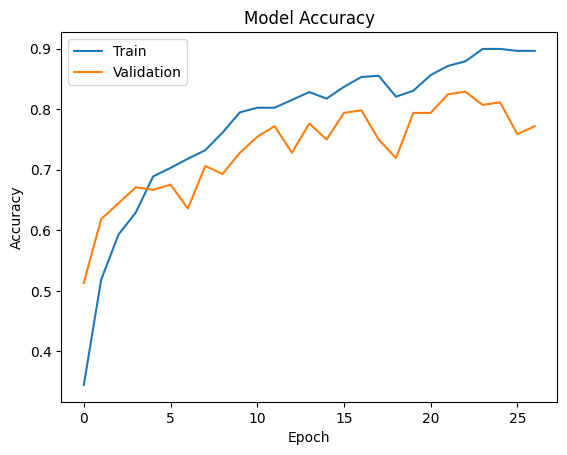

In [11]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

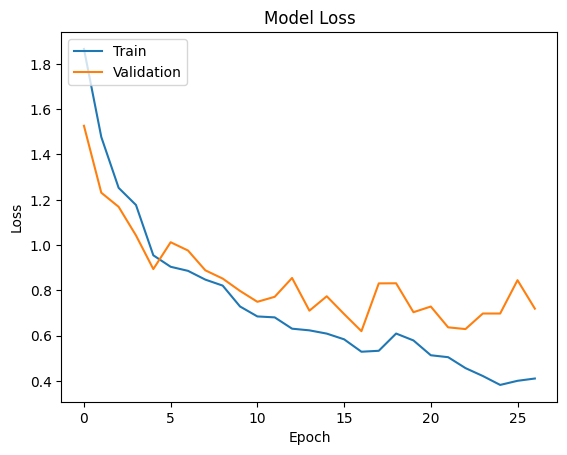

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [13]:
def predict_deficiency(img_path):
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=(224, 224))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.  

    prediction = model.predict(img_array)
    categories = ['algal Leaf','Anthracnose','bird eye spot','brown blight','gray light','Healthy','red leaf spot','white spot','']

    predicted_class = np.argmax(prediction[0])
    
    print(f"Predicted Category: {categories[predicted_class]}")


predict_deficiency('Test4.jpg') 

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predicted Category: Healthy
